## Assignment 3
#### Injamuri Krutika, M.Tech C.S, 18MCMT20


### Question 1:

#### K Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def k_means_clustering(X, k):
    initial_centroids = X[np.random.choice(X.shape[0],k,replace = False)]
    centroids = initial_centroids.copy()
    distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    prev_minimum_dist_matrix = np.ones((centroids.shape[0],X.shape[0]))
    iterations = 0
    while(np.array_equal(minimum_dist_matrix, prev_minimum_dist_matrix) == False):
        iterations += 1
        prev_minimum_dist_matrix = np.copy(minimum_dist_matrix)
        minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        for i,centroid in enumerate(centroids):
            distance_matrix[i] = np.sqrt(np.sum((X-centroid)**2,axis=1))

        for i,j in enumerate(np.argmin(distance_matrix,axis=0)):
            minimum_dist_matrix[j][i] = 1

        for i in range(k):
            data_points = X[np.where(minimum_dist_matrix[i] == 1)]
            if data_points.size:
                centroids[i] = np.mean(data_points,axis = 0)
                
    print("Total Iterataions: ",iterations)
    return initial_centroids, centroids, np.array([X[minimum_dist_matrix[i] == 1] for i in range(k)])

In [3]:
def plot_clusters(clusters, centroids_new,title):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c="r")
    ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c="g")
    ax.scatter(clusters[2][:, 0], clusters[2][:, 1], clusters[2][:, 2], c="b")
    ax.scatter(centroids_new[:, 0], centroids_new[:, 1], centroids_new[:, 2], c="m", marker="x")
    plt.title(title)
    plt.show()

In [4]:
iris_dataset = np.genfromtxt("data/iris.csv",delimiter=",")
iris_dataset = iris_dataset[:,:3]
centroids, centroids_new, clusters = k_means_clustering(iris_dataset, 3)
print("Old Centroids: ",centroids, end="\n")
print("New Centroids: ",centroids_new, end="\n")


Total Iterataions:  4
Old Centroids:  [[6.1 2.9 4.7]
 [6.7 3.1 4.7]
 [4.9 3.1 1.5]]
New Centroids:  [[5.86101695 2.73898305 4.36949153]
 [6.83902439 3.06341463 5.67804878]
 [5.006      3.418      1.464     ]]


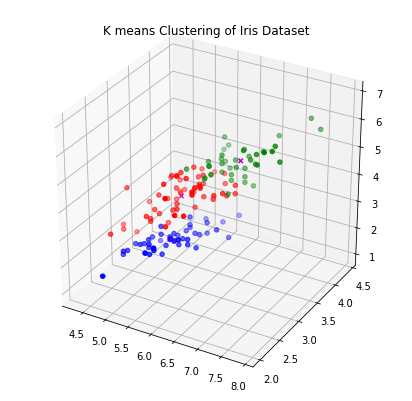

In [5]:
plot_clusters(clusters, centroids_new,"K means Clustering of Iris Dataset")

### Cancer Dataset

In [6]:
file = open('data/arcene_train.data')
X = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])
X = X[:,:3]
centroids, centroids_new, clusters = k_means_clustering(X, 3)
print("Old Centroids: ",centroids, end="\n")
print("New Centroids: ",centroids_new, end="\n")


Total Iterataions:  7
Old Centroids:  [[49 78  0]
 [ 0 41 82]
 [ 6 34  4]]
New Centroids:  [[ 10  73  26]
 [104  34 158]
 [ 15   9  16]]


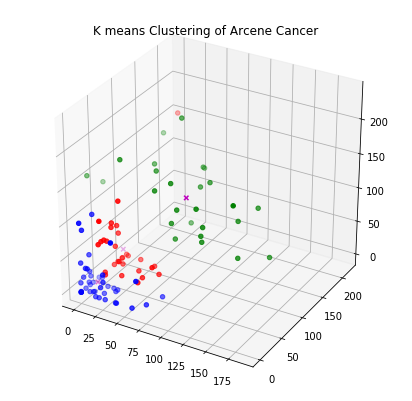

In [7]:
plot_clusters(clusters, centroids_new,"K means Clustering of Arcene Cancer")